In [1]:
import torch
import numpy as np
import uncertainty_toolbox as uct
import uncertainty_toolbox.metrics as umetrics
from uncertainty_toolbox.metrics_calibration import (
    get_proportion_lists_vectorized,
)
import uncertainty_toolbox.viz as uviz
from uncertainty_toolbox.recalibration import iso_recal

from data import data_preprocess
from evaluation import metrics
from model import end2end_kernel

In [2]:
x_train, y_train, x_test, y_test = data_preprocess.data_preprocess('yacht')

In [3]:
y_mean = torch.mean(y_train)
y_sd = torch.std(y_train)

y_train = (y_train - y_mean) / y_sd

In [4]:
end2end_model = end2end_kernel.train_model_kernel(x_train, y_train, n_epoch = 2000, hidden_layers = [30, 30], learning_rate = 0.01, exp_decay = .998)

initial loss:  10.583066940307617
nllk loss:  tensor(1.2151, grad_fn=<MeanBackward0>) kernel loss: tensor(3.1226, grad_fn=<AddBackward0>)
nllk loss:  tensor(0.9192, grad_fn=<MeanBackward0>) kernel loss: tensor(11.6139, grad_fn=<AddBackward0>)
nllk loss:  tensor(1.4538, grad_fn=<MeanBackward0>) kernel loss: tensor(20.1540, grad_fn=<AddBackward0>)
nllk loss:  tensor(1.3994, grad_fn=<MeanBackward0>) kernel loss: tensor(18.3642, grad_fn=<AddBackward0>)
nllk loss:  tensor(1.0128, grad_fn=<MeanBackward0>) kernel loss: tensor(7.8327, grad_fn=<AddBackward0>)
nllk loss:  tensor(0.7749, grad_fn=<MeanBackward0>) kernel loss: tensor(15.3147, grad_fn=<AddBackward0>)
nllk loss:  tensor(0.7839, grad_fn=<MeanBackward0>) kernel loss: tensor(13.5132, grad_fn=<AddBackward0>)
nllk loss:  tensor(0.4440, grad_fn=<MeanBackward0>) kernel loss: tensor(6.7940, grad_fn=<AddBackward0>)
nllk loss:  tensor(0.4619, grad_fn=<MeanBackward0>) kernel loss: tensor(5.4222, grad_fn=<AddBackward0>)
nllk loss:  tensor(0.2164

nllk loss:  tensor(-1.7845, grad_fn=<MeanBackward0>) kernel loss: tensor(0.5346, grad_fn=<AddBackward0>)
nllk loss:  tensor(-1.7945, grad_fn=<MeanBackward0>) kernel loss: tensor(0.5650, grad_fn=<AddBackward0>)
nllk loss:  tensor(-1.8379, grad_fn=<MeanBackward0>) kernel loss: tensor(0.8871, grad_fn=<AddBackward0>)
nllk loss:  tensor(-1.8213, grad_fn=<MeanBackward0>) kernel loss: tensor(0.6794, grad_fn=<AddBackward0>)
nllk loss:  tensor(-1.9432, grad_fn=<MeanBackward0>) kernel loss: tensor(0.7325, grad_fn=<AddBackward0>)
nllk loss:  tensor(-2.0378, grad_fn=<MeanBackward0>) kernel loss: tensor(0.7079, grad_fn=<AddBackward0>)
nllk loss:  tensor(-2.0729, grad_fn=<MeanBackward0>) kernel loss: tensor(0.9569, grad_fn=<AddBackward0>)
nllk loss:  tensor(-1.8144, grad_fn=<MeanBackward0>) kernel loss: tensor(0.8355, grad_fn=<AddBackward0>)
nllk loss:  tensor(-1.8270, grad_fn=<MeanBackward0>) kernel loss: tensor(0.3719, grad_fn=<AddBackward0>)
nllk loss:  tensor(-1.3140, grad_fn=<MeanBackward0>) ke

nllk loss:  tensor(-2.8294, grad_fn=<MeanBackward0>) kernel loss: tensor(0., grad_fn=<AddBackward0>)
nllk loss:  tensor(-2.9946, grad_fn=<MeanBackward0>) kernel loss: tensor(0.7448, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.0490, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0317, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.1355, grad_fn=<MeanBackward0>) kernel loss: tensor(0.5494, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.1275, grad_fn=<MeanBackward0>) kernel loss: tensor(0.3790, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.1994, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0047, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.2442, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2118, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.1787, grad_fn=<MeanBackward0>) kernel loss: tensor(0.6517, grad_fn=<AddBackward0>)
nllk loss:  tensor(-2.8157, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2013, grad_fn=<AddBackward0>)
nllk loss:  tensor(-1.2461, grad_fn=<MeanBackward0>) kernel

nllk loss:  tensor(-3.9245, grad_fn=<MeanBackward0>) kernel loss: tensor(0.6663, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.9242, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0211, grad_fn=<AddBackward0>)
nllk loss:  tensor(-4.0134, grad_fn=<MeanBackward0>) kernel loss: tensor(0.6590, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.8844, grad_fn=<MeanBackward0>) kernel loss: tensor(0.7000, grad_fn=<AddBackward0>)
nllk loss:  tensor(-4.0195, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2329, grad_fn=<AddBackward0>)
nllk loss:  tensor(-4.0271, grad_fn=<MeanBackward0>) kernel loss: tensor(0.4591, grad_fn=<AddBackward0>)
nllk loss:  tensor(-4.0560, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0253, grad_fn=<AddBackward0>)
nllk loss:  tensor(-4.1591, grad_fn=<MeanBackward0>) kernel loss: tensor(0.3625, grad_fn=<AddBackward0>)
nllk loss:  tensor(-4.0167, grad_fn=<MeanBackward0>) kernel loss: tensor(0.3046, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.4316, grad_fn=<MeanBackward0>) ke

nllk loss:  tensor(-4.2684, grad_fn=<MeanBackward0>) kernel loss: tensor(0.3438, grad_fn=<AddBackward0>)
nllk loss:  tensor(-4.2688, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2303, grad_fn=<AddBackward0>)
nllk loss:  tensor(-4.1434, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2507, grad_fn=<AddBackward0>)
nllk loss:  tensor(-4.2851, grad_fn=<MeanBackward0>) kernel loss: tensor(0.3304, grad_fn=<AddBackward0>)
nllk loss:  tensor(-4.3531, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0255, grad_fn=<AddBackward0>)
nllk loss:  tensor(-4.1784, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0794, grad_fn=<AddBackward0>)
nllk loss:  tensor(-4.1067, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0048, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.9055, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0605, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.9499, grad_fn=<MeanBackward0>) kernel loss: tensor(0.3735, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.5359, grad_fn=<MeanBackward0>) ke

nllk loss:  tensor(4.8539, grad_fn=<MeanBackward0>) kernel loss: tensor(0.3145, grad_fn=<AddBackward0>)
nllk loss:  tensor(4.2934, grad_fn=<MeanBackward0>) kernel loss: tensor(0.8777, grad_fn=<AddBackward0>)
nllk loss:  tensor(-1.7385, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2013, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.9216, grad_fn=<MeanBackward0>) kernel loss: tensor(0.3929, grad_fn=<AddBackward0>)
nllk loss:  tensor(-4.2102, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1634, grad_fn=<AddBackward0>)
nllk loss:  tensor(-4.3547, grad_fn=<MeanBackward0>) kernel loss: tensor(0.3793, grad_fn=<AddBackward0>)
nllk loss:  tensor(-4.3815, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0772, grad_fn=<AddBackward0>)
nllk loss:  tensor(-4.4398, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1632, grad_fn=<AddBackward0>)
nllk loss:  tensor(-4.4711, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0228, grad_fn=<AddBackward0>)
nllk loss:  tensor(-4.5079, grad_fn=<MeanBackward0>) kern

nllk loss:  tensor(-5.2338, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2208, grad_fn=<AddBackward0>)
nllk loss:  tensor(-5.1976, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1175, grad_fn=<AddBackward0>)
nllk loss:  tensor(-5.2688, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0421, grad_fn=<AddBackward0>)
nllk loss:  tensor(-5.2964, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1332, grad_fn=<AddBackward0>)
nllk loss:  tensor(-5.2629, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1469, grad_fn=<AddBackward0>)
nllk loss:  tensor(-5.2588, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1584, grad_fn=<AddBackward0>)
nllk loss:  tensor(-5.2406, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0510, grad_fn=<AddBackward0>)
nllk loss:  tensor(-5.0783, grad_fn=<MeanBackward0>) kernel loss: tensor(0., grad_fn=<AddBackward0>)
nllk loss:  tensor(-4.5894, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2335, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.5090, grad_fn=<MeanBackward0>) kernel

nllk loss:  tensor(-5.5783, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0881, grad_fn=<AddBackward0>)
nllk loss:  tensor(-5.6283, grad_fn=<MeanBackward0>) kernel loss: tensor(0., grad_fn=<AddBackward0>)
nllk loss:  tensor(-5.6475, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2153, grad_fn=<AddBackward0>)
nllk loss:  tensor(-5.6281, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0433, grad_fn=<AddBackward0>)
nllk loss:  tensor(-5.6296, grad_fn=<MeanBackward0>) kernel loss: tensor(0.3349, grad_fn=<AddBackward0>)
nllk loss:  tensor(-5.5203, grad_fn=<MeanBackward0>) kernel loss: tensor(0., grad_fn=<AddBackward0>)
nllk loss:  tensor(-5.4300, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2438, grad_fn=<AddBackward0>)
nllk loss:  tensor(-5.0410, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1356, grad_fn=<AddBackward0>)
nllk loss:  tensor(-4.3160, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0581, grad_fn=<AddBackward0>)
nllk loss:  tensor(-2.3628, grad_fn=<MeanBackward0>) kernel los

nllk loss:  tensor(-2.6579, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0412, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.7287, grad_fn=<MeanBackward0>) kernel loss: tensor(0.3893, grad_fn=<AddBackward0>)
nllk loss:  tensor(-4.0753, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1988, grad_fn=<AddBackward0>)
nllk loss:  tensor(-5.1539, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1563, grad_fn=<AddBackward0>)
nllk loss:  tensor(-5.3966, grad_fn=<MeanBackward0>) kernel loss: tensor(0., grad_fn=<AddBackward0>)
nllk loss:  tensor(-5.6772, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1382, grad_fn=<AddBackward0>)
nllk loss:  tensor(-5.7142, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1010, grad_fn=<AddBackward0>)
nllk loss:  tensor(-5.7838, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1768, grad_fn=<AddBackward0>)
nllk loss:  tensor(-5.7762, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0641, grad_fn=<AddBackward0>)
nllk loss:  tensor(-5.7863, grad_fn=<MeanBackward0>) kernel

nllk loss:  tensor(-6.0757, grad_fn=<MeanBackward0>) kernel loss: tensor(0., grad_fn=<AddBackward0>)
nllk loss:  tensor(-6.0892, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1062, grad_fn=<AddBackward0>)
nllk loss:  tensor(-6.0685, grad_fn=<MeanBackward0>) kernel loss: tensor(0., grad_fn=<AddBackward0>)
nllk loss:  tensor(-6.0472, grad_fn=<MeanBackward0>) kernel loss: tensor(0., grad_fn=<AddBackward0>)
nllk loss:  tensor(-6.0021, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0103, grad_fn=<AddBackward0>)
nllk loss:  tensor(-5.8922, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0881, grad_fn=<AddBackward0>)
nllk loss:  tensor(-5.7926, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0035, grad_fn=<AddBackward0>)
nllk loss:  tensor(-5.5119, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1269, grad_fn=<AddBackward0>)
nllk loss:  tensor(-5.2830, grad_fn=<MeanBackward0>) kernel loss: tensor(0.3519, grad_fn=<AddBackward0>)
nllk loss:  tensor(-4.6642, grad_fn=<MeanBackward0>) kernel loss: t

nllk loss:  tensor(-6.3145, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0449, grad_fn=<AddBackward0>)
nllk loss:  tensor(-6.3345, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1193, grad_fn=<AddBackward0>)
nllk loss:  tensor(-6.3340, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0684, grad_fn=<AddBackward0>)
nllk loss:  tensor(-6.3100, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0921, grad_fn=<AddBackward0>)
nllk loss:  tensor(-6.3042, grad_fn=<MeanBackward0>) kernel loss: tensor(0., grad_fn=<AddBackward0>)
nllk loss:  tensor(-6.2963, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1179, grad_fn=<AddBackward0>)
nllk loss:  tensor(-6.2619, grad_fn=<MeanBackward0>) kernel loss: tensor(0., grad_fn=<AddBackward0>)
nllk loss:  tensor(-6.2044, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1047, grad_fn=<AddBackward0>)
nllk loss:  tensor(-6.1272, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2005, grad_fn=<AddBackward0>)
nllk loss:  tensor(-6.0083, grad_fn=<MeanBackward0>) kernel los

nllk loss:  tensor(-6.5479, grad_fn=<MeanBackward0>) kernel loss: tensor(0., grad_fn=<AddBackward0>)
nllk loss:  tensor(-6.5572, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0327, grad_fn=<AddBackward0>)
nllk loss:  tensor(-6.5602, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0111, grad_fn=<AddBackward0>)
nllk loss:  tensor(-6.5586, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0344, grad_fn=<AddBackward0>)
nllk loss:  tensor(-6.5564, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0309, grad_fn=<AddBackward0>)
nllk loss:  tensor(-6.5607, grad_fn=<MeanBackward0>) kernel loss: tensor(0., grad_fn=<AddBackward0>)
nllk loss:  tensor(-6.5602, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0762, grad_fn=<AddBackward0>)
nllk loss:  tensor(-6.5626, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1244, grad_fn=<AddBackward0>)
nllk loss:  tensor(-6.5452, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0158, grad_fn=<AddBackward0>)
nllk loss:  tensor(-6.5141, grad_fn=<MeanBackward0>) kernel los

nllk loss:  tensor(-6.6699, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0723, grad_fn=<AddBackward0>)
nllk loss:  tensor(-6.6761, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2253, grad_fn=<AddBackward0>)
nllk loss:  tensor(-6.6735, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0293, grad_fn=<AddBackward0>)
nllk loss:  tensor(-6.6849, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1318, grad_fn=<AddBackward0>)
nllk loss:  tensor(-6.6899, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0401, grad_fn=<AddBackward0>)
nllk loss:  tensor(-6.6986, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1725, grad_fn=<AddBackward0>)
nllk loss:  tensor(-6.7108, grad_fn=<MeanBackward0>) kernel loss: tensor(0., grad_fn=<AddBackward0>)
nllk loss:  tensor(-6.7185, grad_fn=<MeanBackward0>) kernel loss: tensor(0., grad_fn=<AddBackward0>)
nllk loss:  tensor(-6.7217, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0621, grad_fn=<AddBackward0>)
nllk loss:  tensor(-6.7117, grad_fn=<MeanBackward0>) kernel los

nllk loss:  tensor(-6.8828, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0381, grad_fn=<AddBackward0>)
nllk loss:  tensor(-6.8801, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1021, grad_fn=<AddBackward0>)
nllk loss:  tensor(-6.8804, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1056, grad_fn=<AddBackward0>)
nllk loss:  tensor(-6.8665, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0896, grad_fn=<AddBackward0>)
nllk loss:  tensor(-6.8630, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1354, grad_fn=<AddBackward0>)
nllk loss:  tensor(-6.8585, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1346, grad_fn=<AddBackward0>)
nllk loss:  tensor(-6.8346, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0573, grad_fn=<AddBackward0>)
nllk loss:  tensor(-6.8085, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1828, grad_fn=<AddBackward0>)
nllk loss:  tensor(-6.7565, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0206, grad_fn=<AddBackward0>)
nllk loss:  tensor(-6.6605, grad_fn=<MeanBackward0>) ke

nllk loss:  tensor(-6.9415, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0481, grad_fn=<AddBackward0>)
nllk loss:  tensor(-6.9202, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2414, grad_fn=<AddBackward0>)
nllk loss:  tensor(-6.8571, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1473, grad_fn=<AddBackward0>)
nllk loss:  tensor(-6.8191, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0813, grad_fn=<AddBackward0>)
nllk loss:  tensor(-6.8055, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0261, grad_fn=<AddBackward0>)
nllk loss:  tensor(-6.7615, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0880, grad_fn=<AddBackward0>)
nllk loss:  tensor(-6.7491, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0188, grad_fn=<AddBackward0>)
nllk loss:  tensor(-6.7028, grad_fn=<MeanBackward0>) kernel loss: tensor(0., grad_fn=<AddBackward0>)
nllk loss:  tensor(-6.7135, grad_fn=<MeanBackward0>) kernel loss: tensor(0., grad_fn=<AddBackward0>)
nllk loss:  tensor(-6.6999, grad_fn=<MeanBackward0>) kernel los

nllk loss:  tensor(-6.9319, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0056, grad_fn=<AddBackward0>)
nllk loss:  tensor(-6.9465, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0376, grad_fn=<AddBackward0>)
nllk loss:  tensor(-6.9471, grad_fn=<MeanBackward0>) kernel loss: tensor(0., grad_fn=<AddBackward0>)
nllk loss:  tensor(-6.9690, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1183, grad_fn=<AddBackward0>)
nllk loss:  tensor(-7.0066, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0591, grad_fn=<AddBackward0>)
nllk loss:  tensor(-7.0306, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1486, grad_fn=<AddBackward0>)
nllk loss:  tensor(-7.0585, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0294, grad_fn=<AddBackward0>)
nllk loss:  tensor(-7.0702, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0039, grad_fn=<AddBackward0>)
nllk loss:  tensor(-7.0925, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0449, grad_fn=<AddBackward0>)
nllk loss:  tensor(-7.1045, grad_fn=<MeanBackward0>) kernel

nllk loss:  tensor(-7.1758, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0157, grad_fn=<AddBackward0>)
nllk loss:  tensor(-7.1820, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0034, grad_fn=<AddBackward0>)
nllk loss:  tensor(-7.1816, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1276, grad_fn=<AddBackward0>)
nllk loss:  tensor(-7.1727, grad_fn=<MeanBackward0>) kernel loss: tensor(0., grad_fn=<AddBackward0>)
nllk loss:  tensor(-7.1801, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0280, grad_fn=<AddBackward0>)
nllk loss:  tensor(-7.1812, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1617, grad_fn=<AddBackward0>)
nllk loss:  tensor(-7.1957, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0290, grad_fn=<AddBackward0>)
nllk loss:  tensor(-7.1983, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0398, grad_fn=<AddBackward0>)
nllk loss:  tensor(-7.2001, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1914, grad_fn=<AddBackward0>)
nllk loss:  tensor(-7.1958, grad_fn=<MeanBackward0>) kernel

End2end test MAPE:  0.24667867
End2end test RMSE:  1.5080376
End2end test NLLK:  4.589012
End2end test CRPS:  tensor(0.6308)


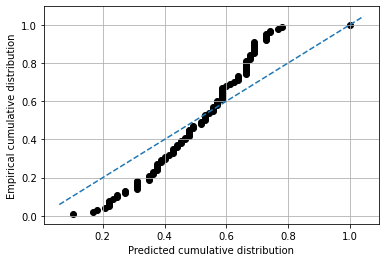

End2end test calibration error when step size is 0.001:  15.765972255017711
End2end test calibration error when step size is 0.01:  1.5528546129195482
End2end test calibration error when step size is 0.1:  0.13082307303086527


In [5]:
mean_pred, var_pred, _ = end2end_model(x_test)
mean_pred = mean_pred.detach().numpy() * y_sd.detach().numpy()+ y_mean.detach().numpy()
var_pred = var_pred.detach().numpy() * torch.pow(y_sd, 2).detach().numpy()
sd_pred = np.sqrt(var_pred)

print('End2end test MAPE: ', metrics.mape(y_test.detach().numpy(), mean_pred))
print('End2end test RMSE: ', metrics.rmse(y_test.detach().numpy(), mean_pred))
print('End2end test NLLK: ', metrics.nllk(y_test.detach().numpy(), mean_pred, var_pred))
print('End2end test CRPS: ', metrics.CRPSMetric(x = y_test.squeeze(dim = 1), loc = torch.tensor(mean_pred).squeeze(dim = 1), scale = torch.tensor(sd_pred).squeeze(dim = 1)).gaussian_crps().mean())

pcdf = metrics.pcdf(mean_pred.squeeze(1), var_pred.squeeze(1), y_test.detach().numpy().squeeze(1))
metrics.draw_pcdf(pcdf)
print('End2end test calibration error when step size is 0.001: ', metrics.calibration_error(pcdf, step = 0.001))
print('End2end test calibration error when step size is 0.01: ', metrics.calibration_error(pcdf, step = 0.01))
print('End2end test calibration error when step size is 0.1: ', metrics.calibration_error(pcdf, step = 0.1))

In [6]:
print(uct.metrics.get_all_metrics(mean_pred.squeeze(1), sd_pred.squeeze(1), y_test.detach().numpy().squeeze(1)))

 (1/n) Calculating accuracy metrics
 (2/n) Calculating average calibration metrics


 20%|████████▌                                  | 2/10 [00:00<00:00, 11.59it/s]

 (3/n) Calculating adversarial group calibration metrics
  [1/2] for mean absolute calibration error
Measuring adversarial group calibration by spanning group size between 0.0 and 1.0, in 10 intervals


 20%|████████▌                                  | 2/10 [00:00<00:00, 11.40it/s]

  [2/2] for root mean squared calibration error
Measuring adversarial group calibration by spanning group size between 0.0 and 1.0, in 10 intervals


100%|██████████████████████████████████████████| 10/10 [00:00<00:00, 11.18it/s]

 (4/n) Calculating sharpness metrics
 (n/n) Calculating proper scoring rule metrics
**Finished Calculating All Metrics**


===================== Accuracy Metrics =====================
  MAE           0.771
  RMSE          1.508
  MDAE          0.296
  MARPD         20.309
  R2            0.992
  Correlation   0.997
=============== Average Calibration Metrics ================
  Root-mean-squared Calibration Error   0.245
  Mean-absolute Calibration Error       0.213
  Miscalibration Area                   0.215
========== Adversarial Group Calibration Metrics ===========
  Mean-absolute Adversarial Group Calibration Error
     Group Size: 0.11 -- Calibration Error: 0.359
     Group Size: 0.56 -- Calibration Error: 0.254
     Group Size: 1.00 -- Calibration Error: 0.213
  Root-mean-squared Adversarial Group Calibration Error
     Group Size: 0.11 -- Calibration Error: 0.443
     Group Size: 0.56 -- Calibration Error: 0.296
     Group Size: 1.00 -- Calibration Error: 0.245
===============

Lims is None. Setting lims now:
min_max_true: (0.08, 62.42)
min_max_pred: (-0.2740736, 57.145344)
lims: (-0.2740736, 62.42)
lims_ext: (-6.54348087310791, 68.68940544128418)


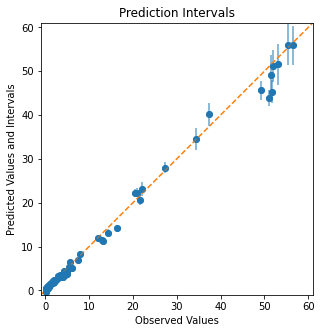

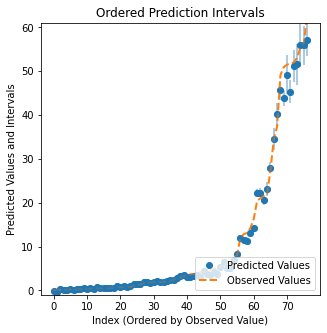

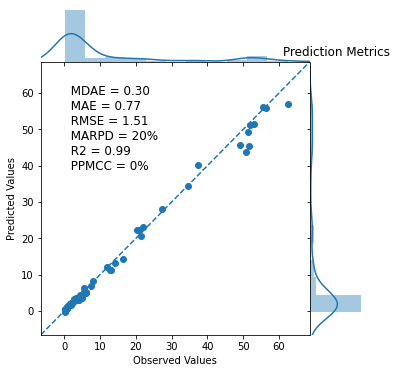

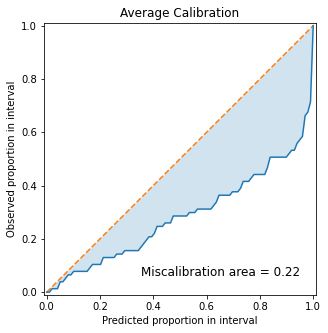

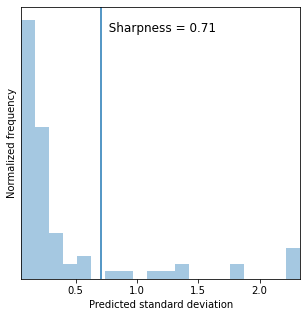

In [7]:
y = y_test.detach().numpy().squeeze(1)

uviz.plot_intervals(mean_pred.squeeze(1), sd_pred.squeeze(1), y)
uviz.plot_intervals_ordered(mean_pred.squeeze(1), sd_pred.squeeze(1), y)
uviz.plot_parity(mean_pred.squeeze(1), y)
uviz.plot_calibration(mean_pred.squeeze(1), sd_pred.squeeze(1), y)
uviz.plot_sharpness(sd_pred.squeeze(1))